## Importing the libraries

In [2]:
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Importing the dataset

In [3]:
X_train, y_train = read_hoda_dataset(dataset_path='Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
 
X_test, y_test = read_hoda_dataset(dataset_path='Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

X_remaining, y_remaining = read_hoda_dataset(dataset_path='RemainingSamples.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

## Visualising the three sample

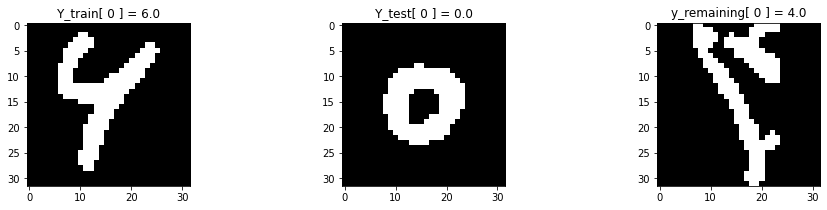

In [4]:
fig = plt.figure(figsize=(16, 3))
fig.add_subplot(1, 3, 1)
plt.title('Y_train[ 0 ] = ' + str(y_train[0]))
plt.imshow(X_train[0].reshape([32, 32]), cmap='gray')

fig.add_subplot(1, 3, 2)
plt.title('Y_test[ 0 ] = ' + str(y_test[0]))
plt.imshow(X_test[0].reshape([32, 32]), cmap='gray')

fig.add_subplot(1, 3, 3)
plt.title('y_remaining[ 0 ] = ' + str(y_remaining[0]))
plt.imshow(X_remaining[0].reshape([32, 32]), cmap='gray')

plt.show()

## Flatten operation 

In [5]:
X_train_flattened = X_train.reshape(len(X_train), 32*32)
X_test_flattened = X_test.reshape(len(X_test), 32*32)

X_train_flattened.shape

(60000, 1024)

## Prepare and Fit a model using Keras

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1355 - accuracy: 0.9620
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0534 - accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0172 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0115 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0066 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.005

## Evaluating model using test set

In [7]:
model.evaluate(X_test_flattened, y_test)
# model.evaluate(X_remaining, y_remaining)

625/625 [==============================] - 1s 1ms/step - loss: 0.1203 - accuracy: 0.9758


[0.12028853595256805, 0.9757500290870667]

## Predicting test lable

In [8]:
y_predicted = model.predict(X_test_flattened)
y_predicted.shape

(20000, 10)

## Funny test

3

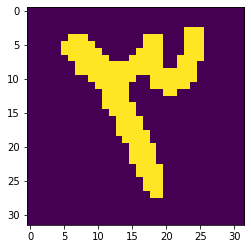

In [11]:
plt.imshow(X_test[6353].reshape([32,32]))
np.argmax(y_predicted[6353])

## Confusionmatrix

In [12]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1978,    0,    0,    1,    1,   15,    2,    3,    0,    0],
       [   1, 1991,    1,    0,    3,    0,    2,    2,    0,    0],
       [   0,    6, 1951,   32,    3,    0,    4,    2,    0,    2],
       [   4,    0,   66, 1896,   28,    2,    1,    1,    2,    0],
       [   2,    2,   22,   56, 1904,    4,    2,    2,    1,    5],
       [   8,    4,    2,    0,   15, 1961,    1,    4,    5,    0],
       [   1,    4,    7,    3,    4,    6, 1942,    3,    2,   28],
       [   1,    5,   11,    0,    1,    7,    3, 1972,    0,    0],
       [   0,    6,    0,    0,    3,   30,    2,    0, 1946,   13],
       [   1,   23,    3,    1,    3,    2,   15,    0,    8, 1944]],
      dtype=int32)>

## Confusionmatrix with swabord

Text(69.0, 0.5, 'Truth')

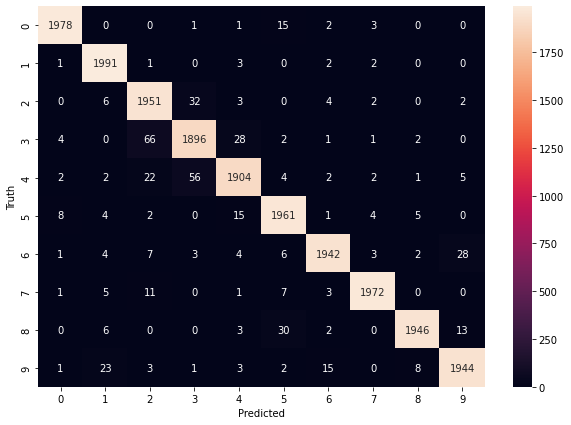

In [13]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Testing model using external sample

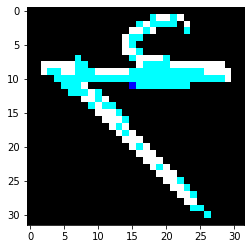

In [14]:
original_img = cv2.imread("Test_image/4.jpg")
resized_img = cv2.resize(original_img, (32, 32))

resultNot = cv2.bitwise_not(src=resized_img, dst=resized_img)
(thresh, blackAndWhiteImage) = cv2.threshold(resultNot, 127, 255, cv2.THRESH_BINARY)
_, _, final_result = cv2.split(blackAndWhiteImage)
final_result = final_result / 255
cv2.cvtColor(blackAndWhiteImage, cv2.COLOR_BGR2RGB)
plt.imshow(blackAndWhiteImage,)

In [15]:
final_result_flattened = final_result.reshape(1, 32*32)
input_y_predicted = model.predict([final_result_flattened])
np.argmax(input_y_predicted)

4